## New model train

In [13]:
import numpy as np
###### Loading the saved files
saved_RMS_raw = np.load("/Users/apple/Documents/work_DFA/All channel data/saved_RMS_v17_raw_15k.npy",allow_pickle=True)
saved_RMS_norm= np.load("/Users/apple/Documents/work_DFA/All channel data/saved_RMS_v17_with_bias_15k.npy",allow_pickle=True)
saved_label = np.load("/Users/apple/Documents/work_DFA/All channel data/saved_RMS_label_v17_with_bias_15k.npy",allow_pickle=True)

In [14]:
import pandas as pd
from sktime.classification.base import BaseClassifier
from sktime.transformations.panel.rocket import (
    MiniRocket,
    MiniRocketMultivariate,
    MultiRocket,
    MultiRocketMultivariate,
    Rocket,
)
from sktime.classification.kernel_based import RocketClassifier


label_1 = []
file_1 = []
pos_codes = []
phase_codes = []
ground_codes = []
waveform_ids = []
for i in saved_label:
    label_1.append(int(i[0]))
    pos_codes.append(i[1])
    phase_codes.append(i[2])
    ground_codes.append(i[3])
    file_1.append(i[4])
    waveform_ids.append(i[5])

label_df = pd.DataFrame(
    {'label': label_1,
     'file_name': file_1,
     'pos_codes':pos_codes,
     'phase_codes':phase_codes,
     'ground_codes':ground_codes,
     'waveform_ids':waveform_ids

    })
labels_unique = label_df.label.unique()
print(labels_unique)
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
lb.fit(labels_unique)
lb.classes_

Y = lb.transform(label_df.label) #fit_transform(saved_RMS_label)
X = saved_RMS_norm
n_samples = len(X)
indices = np.arange(n_samples)

[10110 10120 12110 13170 15110]


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(X, Y,indices,test_size = 0.2,random_state = 10)
clf = RocketClassifier(num_kernels=4000,rocket_transform="rocket")
clf.fit(X_train, y_train)

RocketClassifier(num_kernels=4000)

In [16]:
# Model store path
filename = '/Users/apple/Documents/work_DFA/All channel data/best_rocket_local2.h5'
pickle.dump(clf, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X_test)

In [54]:
y_pred

array([2, 4, 0, 0, 3, 0, 1, 2, 2, 0, 0, 0, 2, 4, 1, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 4, 4, 1, 2, 1, 3, 3, 4, 4, 0, 0, 1, 4, 1, 0, 0, 1, 4, 0,
       0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 3, 2, 0, 4, 3, 1, 2, 1, 4, 4, 0,
       1, 1, 2, 3, 2, 3, 2, 0, 3, 4, 0, 2, 3, 2, 0, 0, 4, 2, 0, 2, 0, 0,
       2, 0, 4, 3, 0, 1, 0, 3, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 3, 0, 1, 0,
       1, 4, 1, 4, 0, 3, 0, 0, 0, 1, 0, 4, 1, 0, 0, 3, 0, 1, 2, 4, 3, 2,
       0, 1, 1, 1, 1, 4, 0, 0, 1, 0, 0, 0, 3, 0, 2, 2, 1, 1, 2, 0, 0, 1,
       0, 4, 0, 3, 0, 4, 3, 1, 0, 4, 1, 0, 0, 1, 4, 0, 0, 1, 4, 1, 2, 0,
       4, 0, 1, 0, 1, 4, 0, 3, 0, 4, 0, 4, 2, 0, 1, 0, 3, 3, 1, 2, 0, 4,
       1, 0, 2, 4, 0, 1, 0, 0, 4, 2, 1, 2, 4, 2, 4, 0, 2, 1, 2, 0, 0, 1,
       4, 0, 1, 3, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 3, 4, 0, 1, 4, 0, 4, 1,
       2, 2, 0, 3, 2, 4, 4, 3, 2, 4, 0, 0, 3, 2, 2, 0, 0, 3, 4, 1, 0, 2,
       0, 1, 0, 2, 1, 4, 1, 1, 0, 2, 1, 2, 2, 0, 1, 0, 0, 2, 4, 4, 2, 0,
       0, 0, 1, 0, 0, 2, 0, 4, 0, 2, 0, 1, 4, 2, 1,

In [72]:
import pandas as pd
import sqlite3

connection =  sqlite3.connect("test_ml.sqlite")
cur = connection.cursor()
df = pd.read_sql_query("SELECT * from dfa_ml_data_records", connection)
file = df.rms_data[2]
file

b'\xe7\x8bDFV\x8aDFV\x91DF1\x8eDF@\x90DF\x91\x91DF\xb6\x92DF.\x90DF\xa5\x93DF\x00\x97DFY\x97DF\xd9\x97DF\x03\x99DF\xba\x9bDF\xc2\x9eDF\xae\xa5DF\xf6\xa7DFs\xaaDF\xc1\xaaDF\xf7\xb0DF\x11\xb4DF\x17\xb5DF\x89\xbbDF\x1c\xbeDF~\xc0DF\x11\xc5DF\x9e\xc7DF\x1b\xd0DFG\xd1DF`\xd2DF\xac\xd5DF\x9b\xd9DF;\xd8DF\xdf\xd7DF\x9b\xdcDF\xa1\xdcDF\x0b\xdeDF\x9a\xe1DF\xb0\xe0DFZ\xe3DF\x0b\xe6DF\xcf\xe5DF\xa9\xe7DF\xf3\xeaDF\xcc\xecDF\xf8\xeeDF\xec\xf0DFr\xf7DF\xe1\xf6DF\x9b\xfaDF-\xfdDF_\xfbDF\xe9\xfcDF\xb9\xfdDF\xaa\xfeDF\x10\x03EF\xbd\x01EF\xe2\x05EF%\x06EF<\x08EF\xea\nEF9\x0bEF\xe1\x0cEF!\x0bEFN\x07EFy\nEFs\x0bEF#\x10EFo\x13EF\xd6\x17EFM\x18EF\x10\x1aEFo\x1aEF\xe4\x19EF4\x1bEF\x84\x1eEF\xec\x19EF\xfe\x19EFr\x17EF\x0b\x18EF\xc4\x18EF\x82\x19EF\xf4\x19EF\xb2\x18EF\x14\x14EF^\x14EFx\x12EF\x86\x12EF\x94\x10EF\x13\x11EF\xfe\x11EFl\x11EF\x8d\x0fEF5\rEFX\tEF\xcc\x06EF\x01\x02EF\xc6\x01EF7\x02EF\xe9\xfeDF\xff\xffDFI\xfdDF^\xfbDF\xb3\xf8DFC\xf5DF\xd7\xf3DF\xea\xebDFD\xeaDF|\xe5DF\xae\xe1DF\xaf\xe3DFS\xe0DFi\xdeD

## Clean code

In [120]:
import numpy as np
file = open("/Users/apple/Documents/work_DFA/All channel data/L35001002_20180101_000808.pqd.bin", "rb")
data = np.fromfile(file, '<f4')  
print('Data shape : '+ str(data.shape[0]))
# data

Data shape : 27060


so 27060/41 = 660, we have 41 signals 

In [124]:
# from sktime.classification.base import BaseClassifier
# from sktime.transformations.panel.rocket import (
#     MiniRocket,
#     MiniRocketMultivariate,
#     MultiRocket,
#     MultiRocketMultivariate,
#     Rocket,
# )
# from sktime.classification.kernel_based import RocketClassifier

import numpy as np
from enum import IntEnum
import pickle
# import numba

# data ingest
file = open("/Users/apple/Documents/work_DFA/All channel data/101009001005_20220509_113055.pqd.bin", "rb")
data = np.fromfile(file, '<f4')  
print('Data shape : '+ str(data.shape))
arr_size = data.shape[0]
data1 = []
data1.append(data)


class Indx(IntEnum):
    ID = 0
    MONITOR = 1
    RECORD = 2
    FILE = 3
    CLASS = 4
    POSITION = 5
    PHASE = 6
    GROUND = 7
    FREQ = 8
    SECONDS = 9
    BLOB = 10
class SIndx(IntEnum):
    ID = 0
    NAME = 1
    PT_S_A = 2
    PT_S_B = 3
    PT_S_C = 4
    PT_P_A = 5
    PT_P_B = 6
    PT_P_C = 7
    CT_S_A = 8
    CT_S_B = 9
    CT_S_C = 10
    CT_P_A = 11
    CT_P_B = 12
    CT_P_C = 13
    VA_SCALE = 14
    VB_SCALE = 15
    VC_SCALE = 16
    IA_SCALE = 17
    IB_SCALE = 18
    IC_SCALE = 19
    PQ_SCALE = 99
    NO_SCALE = 100
class Channels(IntEnum):
    VA    =    0
    VB    =    1
    VC    =    2
    IA    =    3
    IB    =    4
    IC    =    5
    IN    =    6
    VA_PD =    7
    VB_PD =    8
    VC_PD =    9
    IA_PD =    10
    IB_PD =    11
    IC_PD =    12
    IN_PD =    13
    PA =       14
    PB =       15
    PC =       16
    QA =       17
    QB =       18
    QC =       19
    VA_SD =    20
    VB_SD =    21
    VC_SD =    22
    IA_SD =    23
    IB_SD =    24
    IC_SD =    25
    IN_SD =    26
    VA_EVENS = 27
    VB_EVENS = 28
    VC_EVENS = 29
    IA_EVENS = 30
    IB_EVENS = 31
    IC_EVENS = 32
    IN_EVENS = 33
    VA_ODDS =  34
    VB_ODDS =  35
    VC_ODDS =  36
    IA_ODDS =  37
    IB_ODDS =  38
    IC_ODDS =  39
    IN_ODDS =  40
class ce(IntEnum):
    v = 0
    i = 3
    v_pd = 6
    i_pd = 9
    v_sd = 12
    i_sd = 15
    v_evens = 18
    i_evens = 21
    v_odds = 24
    i_odds = 27
    p = 30
    q = 33

def get_raw_vector_bulk(records_in, channel, scale_indx):
    arr = np.frombuffer(records_in[-1], dtype=np.float32)
    leng = int(arr_size/41)#arr[Indx.SECONDS] * arr[Indx.FREQ]
    # array size constant 660 #######change
    vect_size  = arr[(leng*channel):(leng*(channel + 1))]
    vect = vect_size[60:180]
    return vect

        
    
def all_channel_input(input_data = data1):
    new_result = dict()
    channels = ['VA','VB','VC',
                'IA','IB','IC',
                'VA_PD','VB_PD','VC_PD',
                'IA_PD','IB_PD','IC_PD',
                'VA_SD','VB_SD','VC_SD',
                'IA_SD','IB_SD','IC_SD',
                'VA_EVENS','VB_EVENS','VC_EVENS',
                'IA_EVENS','IB_EVENS','IC_EVENS',
                'VA_ODDS','VB_ODDS','VC_ODDS',
                'IA_ODDS','IB_ODDS','IC_ODDS',
                'PA','PB','PC',
                'QA','QB','QC' ]
    
    rms_raw_vecs = []
    
    for j in channels:
#         print(j)

        if j == 'VA':
            channel=Channels.VA
            scale_indx = SIndx.VA_SCALE
        elif j == 'VB':
            channel=Channels.VB
            scale_indx = SIndx.VB_SCALE
        elif j == 'VC':
            channel=Channels.VC
            scale_indx = SIndx.VC_SCALE
        elif j == 'IA':
            channel=Channels.IA
            scale_indx = SIndx.IA_SCALE
        elif j == 'IB':
            channel=Channels.IB
            scale_indx = SIndx.IB_SCALE
        elif j == 'IC':
            channel=Channels.IC
            scale_indx = SIndx.IC_SCALE
        elif j == 'VA_PD':
            channel=Channels.VA_PD
            scale_indx = SIndx.VA_SCALE
        elif j == 'VB_PD':
            channel=Channels.VB_PD
            scale_indx = SIndx.VB_SCALE
        elif j == 'VC_PD':
            channel=Channels.VC_PD
            scale_indx = SIndx.VC_SCALE
        elif j == 'IA_PD':
            channel=Channels.IA_PD
            scale_indx = SIndx.IA_SCALE
        elif j == 'IB_PD':
            channel=Channels.IB_PD
            scale_indx = SIndx.IB_SCALE
        elif j == 'IC_PD':
            channel=Channels.IC_PD
            scale_indx = SIndx.IC_SCALE
        elif j == 'VA_SD':
            channel=Channels.VA_SD
            scale_indx = SIndx.VA_SCALE
        elif j == 'VB_SD':
            channel=Channels.VB_SD
            scale_indx = SIndx.VB_SCALE
        elif j == 'VC_SD':
            channel=Channels.VC_SD
            scale_indx = SIndx.VC_SCALE 
        elif j == 'IA_SD':
            channel=Channels.IA_SD
            scale_indx = SIndx.IA_SCALE
        elif j == 'IB_SD':
            channel=Channels.IB_SD
            scale_indx = SIndx.IB_SCALE
        elif j == 'IC_SD':
            channel=Channels.IC_SD
            scale_indx = SIndx.IC_SCALE
        elif j == 'VA_EVENS':
            channel=Channels.VA_EVENS
            scale_indx = SIndx.VA_SCALE
        elif j == 'VB_EVENS':
            channel=Channels.VB_EVENS
            scale_indx = SIndx.VB_SCALE
        elif j == 'VC_EVENS':
            channel=Channels.VC_EVENS
            scale_indx = SIndx.VC_SCALE 
        elif j == 'IA_EVENS':
            channel=Channels.IA_EVENS
            scale_indx = SIndx.IA_SCALE
        elif j == 'IB_EVENS':
            channel=Channels.IB_EVENS
            scale_indx = SIndx.IB_SCALE
        elif j == 'IC_EVENS':
            channel=Channels.IC_EVENS
            scale_indx = SIndx.IC_SCALE
        elif j == 'VA_ODDS':
            channel=Channels.VA_ODDS
            scale_indx = SIndx.VA_SCALE
        elif j == 'VB_ODDS':
            channel=Channels.VB_ODDS
            scale_indx = SIndx.VB_SCALE
        elif j == 'VC_ODDS':
            channel=Channels.VC_ODDS
            scale_indx = SIndx.VC_SCALE 
        elif j == 'IA_ODDS':
            channel=Channels.IA_ODDS
            scale_indx = SIndx.IA_SCALE
        elif j == 'IB_ODDS':
            channel=Channels.IB_ODDS
            scale_indx = SIndx.IB_SCALE
        elif j == 'IC_ODDS':
            channel=Channels.IC_ODDS
            scale_indx = SIndx.IC_SCALE
        elif j =='PA':
            channel=Channels.PA
            scale_indx = SIndx.VA_SCALE
        elif j =='PB':
            channel=Channels.PB
            scale_indx = SIndx.VB_SCALE
        elif j =='PC':
            channel=Channels.PC
            scale_indx = SIndx.VC_SCALE                
        elif j =='QA':
            channel=Channels.QA
            scale_indx = SIndx.IA_SCALE
        elif j =='QB':
            channel=Channels.QB
            scale_indx = SIndx.IB_SCALE
        elif j =='QC':
            channel=Channels.QC
            scale_indx = SIndx.IC_SCALE

        vect = get_raw_vector_bulk(records_in = data1, channel=channel, scale_indx = scale_indx)
#         print(vect)
        rms_raw_vecs.append(vect)
        
#         new_result[0] = rms_raw_vecs
            
    return rms_raw_vecs

####### Normalization and bias addition #########
i_params ={
    'small': 10,
    'med_start': 100,
    'med_end': 500,
    'big': 1000
    }

pq_params ={
    'small': 10000,
    'med_start': 50000,
    'med_end': 100000,
    'big': 500000
    }

def fuzzy_scale(val, params):
    ret = 0.0
    if val <= params['small']:
        ret = 0.33
    elif val < params['med_start']:
        ret  = 0.33 + (val - params['small']) * (0.33/(params['med_start'] - params['small']))
    elif val <= params['med_end']:
        ret = 0.66
    elif val < params['big']:
        ret  = 0.66 + (val - params['med_end']) * (0.33/(params['big'] - params['med_end']))
    else:
        ret = 1.0
    return ret

############ ends ##############





def normalize(rms_vec ,new_max = 0):
    _all = rms_vec
    
    
### new normalization ###
    vabc_all = np.stack((_all[0],_all[1],_all[2]))
    vabc_max = np.max(vabc_all)
    vabc_min = np.min(vabc_all)

    v_range = vabc_max - vabc_min
    if new_max == 0:
        if v_range < 1 or vabc_max < 1:
            print('found ' + str(v_range)+' <0 or '+ str(vabc_max)+' <0' )
            norm_va,norm_vb,norm_vc = ['x'],['x'],['x']
            v_bias = ['x']
        else:
            #skip the record
            # vabc_max if <1 skip this
            v_scale = v_range/vabc_max
            norm_va = (_all[0] - vabc_min)/(v_range)
            norm_vb = (_all[1] - vabc_min)/(v_range)
            norm_vc = (_all[2] - vabc_min)/(v_range)
            v_bias = [v_scale] * 120
    else:
        if v_range < 1 or vabc_max < 1:
            print('found ' + str(v_range)+' <0 or '+ str(vabc_max)+' <0' )
            norm_va,norm_vb,norm_vc = ['x'],['x'],['x']
            v_bias = ['x']
        else:
            v_scale = v_range/vabc_max
            norm_va = (_all[0])/(vabc_max)
            norm_vb = (_all[1])/(vabc_max)
            norm_vc = (_all[2])/(vabc_max)
            v_bias = [v_scale] * 120
    
#     print(norm_va.shape)
#     print(norm_vb.shape)
#     print(norm_vc.shape)
    ## IA,IB,IC 
    iabc_all = np.stack((_all[3],_all[4],_all[5]))
    iabc_max = np.max(iabc_all)
    iabc_min = np.min(iabc_all)

    # i channel
    
    i_range = iabc_max - iabc_min #skip the record if < 0.001
    
    if new_max == 0:
        if i_range < 0.001:
            print('found ' + str(i_range)+' <0.001'  )
            norm_ia,norm_ib,norm_ic = ['x'],['x'],['x']
            i_bias = ['x']
    #     elif iabc_max < 1:
    #         norm_va,norm_vb,norm_vc = ['x'],['x'],['x']
        else:
            i_scale = fuzzy_scale(i_range, i_params)
            norm_ia = (_all[3] - iabc_min)/(i_range)
            norm_ib = (_all[4] - iabc_min)/(i_range)
            norm_ic = (_all[5] - iabc_min)/(i_range)
            i_bias = [i_scale] * 120
    else:
        if i_range < 0.001:
            print('found ' + str(i_range)+' <0.001'  )
            norm_ia,norm_ib,norm_ic = ['x'],['x'],['x']
            i_bias = ['x']
        else:
            i_scale = fuzzy_scale(i_range, i_params)
            norm_ia = (_all[3])/(iabc_max)
            norm_ib = (_all[4])/(iabc_max)
            norm_ic = (_all[5])/(iabc_max)
            i_bias = [i_scale] * 120
            
#     print(norm_ia.shape)
#     print(norm_ib.shape)
#     print(norm_ic.shape)
    
    #'VA_PD','VB_PD','VC_PD'
    PD_vabc_all =  np.stack((_all[6],_all[7],_all[8]))
    PD_vabc_max = np.max(PD_vabc_all)
    PD_vabc_min = np.min(PD_vabc_all)

    v_pd_scale = PD_vabc_max/vabc_max #vabc_max<1 skip and PD_vabc_max< 1
    
    if vabc_max <1 or PD_vabc_max<1:
        print('found ' + str(vabc_max)+' <1'  )
        norm_va_pd,norm_vb_pd,norm_vc_pd = ['x'],['x'],['x']
        vpd_bias = ['x'] 
    else: 
        norm_va_pd = (_all[6] )/( PD_vabc_max)
        norm_vb_pd = (_all[7] )/( PD_vabc_max)
        norm_vc_pd = (_all[8] )/( PD_vabc_max)
        vpd_bias = [v_pd_scale] * 120
    
#     print(norm_va_pd.shape)
#     print(norm_vb_pd.shape)
#     print(norm_vc_pd.shape)
    #IA_PD,IB_PD,IC_PD
    PD_iabc_all = np.stack((_all[9],_all[10],_all[11]))
    PD_iabc_max = np.max(PD_iabc_all)
    PD_iabc_min = np.min(PD_iabc_all)
    
    
    if PD_iabc_max<0.001:
        print('found ' + str(PD_iabc_max)+' <0.001'  )
        norm_ia_pd,norm_ib_pd,norm_ic_pd = ['x'],['x'],['x']
        ipd_bias = ['x'] 
    else:
        i_pd_scale = fuzzy_scale(PD_iabc_max, i_params)
        norm_ia_pd = (_all[9] )/(PD_iabc_max)# PD_iabc_max <0.001
        norm_ib_pd = (_all[10])/(PD_iabc_max)
        norm_ic_pd = (_all[11])/(PD_iabc_max)
        ipd_bias = [i_pd_scale] * 120
    
#     print(norm_ia_pd.shape)
#     print(norm_ib_pd.shape)
#     print(norm_ic_pd.shape)
    ### I_EVEN & I_ODD
    
    ## I_EVEN
    even_iabc_all = np.stack((_all[21],_all[22],_all[23]))
    even_iabc_max = np.max(even_iabc_all)
    even_iabc_min = np.min(even_iabc_all)
#     print(even_iabc_all)
    if even_iabc_max<1e-10:
        print('found even_iabc_max' + str(even_iabc_all)+' <0.001'  )
        norm_ia_even,norm_ib_even,norm_ic_even = ['x'],['x'],['x']
        ieven_bias = ['x'] 
    else:
        i_even_scale = fuzzy_scale(even_iabc_max, i_params)
        norm_ia_even = (_all[21] )/(even_iabc_max)# even_iabc_max <0.001
        norm_ib_even = (_all[22])/(even_iabc_max)
        norm_ic_even = (_all[23])/(even_iabc_max)
        ieven_bias = [i_even_scale] * 120
     
#     print(norm_ia_even.shape)
#     print(norm_ib_even.shape)
#     print(norm_ic_even.shape)
    
    ## I_ODD
    odd_iabc_all = np.stack((_all[27],_all[28],_all[29]),axis=0)
    odd_iabc_max = np.max(odd_iabc_all)
    odd_iabc_min = np.min(odd_iabc_all)
    if odd_iabc_max<1e-10:
        print('found ' + str(odd_iabc_all)+' <0.001'  )
        norm_ia_odd,norm_ib_odd,norm_ic_odd = ['x'],['x'],['x']
        iodd_bias = ['x'] 
    else:
        i_odd_scale = fuzzy_scale(odd_iabc_max, i_params)
        norm_ia_odd = (_all[27] )/(odd_iabc_max)# odd_iabc_max <0.001
        norm_ib_odd = (_all[28])/(odd_iabc_max)
        norm_ic_odd = (_all[29])/(odd_iabc_max)
        iodd_bias = [i_odd_scale] * 120
    
#     print(norm_ia_odd.shape)
#     print(norm_ib_odd.shape)
#     print(norm_ic_odd.shape)
    
    #PA,PB,PC
    pabc_all = np.stack((_all[30],_all[31],_all[32]))
    pabc_min = np.min(pabc_all)
    pabc_max = np.max(pabc_all)

    p_range = pabc_max - pabc_min # p_range<1 skip
    if p_range<1:
        print('found ' + str(p_range)+' <1'  )
        norm_pa,norm_pb,norm_pc = ['x'],['x'],['x']
        p_bias = ['x']
    else:
        p_scale = fuzzy_scale(p_range, pq_params)
        norm_pa = (_all[30] - float(pabc_min))/p_range
        norm_pb = (_all[31] - float(pabc_min))/p_range
        norm_pc = (_all[32] - float(pabc_min))/p_range
        p_bias = [p_scale] * 120
#     print(norm_pa.shape)
#     print(norm_pb.shape)
#     print(norm_pc.shape)
    # QA,QB,QC
    qabc_all = np.stack((_all[33],_all[34],_all[35]))
    qabc_min = np.min(qabc_all)
    qabc_max = np.max(qabc_all)
    
    q_range = qabc_max - qabc_min # q_range<1 skip 
    if q_range< 1:
        print('found ' + str(q_range)+' <1'  )
        norm_qa,norm_qb,norm_qc = ['x'],['x'],['x']
        q_bias = ['x'] 
    else:  
        q_scale = fuzzy_scale(q_range, pq_params)
        norm_qa= (_all[33] - qabc_min)/q_range
        norm_qb= (_all[34] - qabc_min)/q_range
        norm_qc= (_all[35] - qabc_min)/q_range
        q_bias = [q_scale] * 120
#     print(norm_qa.shape)
#     print(norm_qb.shape)
#     print(norm_qc.shape)
############# NEW NORMALIZATION ENDS###########

    final_norm = [np.array(v_bias), norm_va,norm_vb,norm_vc,# np.array(v_bias)
                  np.array(i_bias) , norm_ia,norm_ib,norm_ic,#np.array(i_bias)
                     np.array(vpd_bias)  , norm_va_pd,norm_vb_pd,norm_vc_pd,# np.array(vpd_bias)
                       np.array(ipd_bias) , norm_ia_pd,norm_ib_pd,norm_ic_pd,#np.array(ipd_bias)
                          np.array(ieven_bias) , norm_ia_even,norm_ib_even,norm_ic_even,#np.array(ieven_bias)
                              np.array(iodd_bias) , norm_ia_odd,norm_ib_odd,norm_ic_odd,#np.array(ipd_bias)
                                  np.array(p_bias) , norm_pa,norm_pb,norm_pc,# np.array(p_bias)
                                     np.array(q_bias) ,  norm_qa,norm_qb,norm_qc#  np.array(q_bias)
                            
                         ]
    return final_norm,_all

vect = get_raw_vector_bulk(data1,channel = Channels.VA, scale_indx =SIndx.VA_SCALE)    
rms_raw_vecs = all_channel_input(data1)
final_norm,_all = normalize(rms_vec=rms_raw_vecs)

norm_x=[]
final_norm =  np.dstack((final_norm))
# final_norm = final_norm.reshape(1,120,32)
# final_norm = final_norm.reshape(1,32,120)
# final_norm = final_norm.astype(np.float32) 
# f = final_norm+final_norm
norm_x.append(final_norm)
# Multi rocket Model store path
# filename = '/Users/apple/Documents/work_DFA/All channel data/best_rocket_local.h5'
# loaded_model = pickle.load(open(filename, 'rb'))
# y_pred = loaded_model.predict(norm_x[0])
# # print(y_pred.shape)
# y_pred
# norm_x[0]

Data shape : (27060,)


AttributeError: 'list' object has no attribute 'shape'

In [122]:
final_norm.shape

(1, 120, 32)

In [94]:
# y_pred[0]
classification = lb.inverse_transform(y_pred)
classification[0]

NameError: name 'lb' is not defined

In [95]:
## InceptionTime Model path
from tensorflow import keras
cls = [10110,10120,12110,13170,15110]
filename = '/Users/apple/Documents/work_DFA/All channel data/best_model_inception_ce_v1.h5'
model = keras.models.load_model(filename)
y_pred1 = model.predict(norm_x[0])
print(y_pred1[0])
pred_list = [i for i in y_pred1[0]]
y_pred_max = np.max(y_pred1, axis=1)
idx = pred_list.index(y_pred_max)
print('predicted class is '+ str(cls[idx]))


[3.0789806e-07 3.9735401e-06 8.6382997e-06 7.2035176e-04 9.9926668e-01]
predicted class is 15110


In [21]:
from sklearn import preprocessing
lbb = preprocessing.LabelBinarizer()
lbb.fit(labels_unique)
lbb.classes_
# lbb.inverse_transform(y_pred1)

array([10110, 10120, 12110, 13170, 15110])

In [1]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [7]:
import tensorflow as tf

model = tf.keras.models.load_model('/Users/apple/Documents/work_DFA/deployment/best_model_inception_ce_v1.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model_inc_ce_2.6.tflite", "wb").write(tflite_model)

2022-06-21 09:30:37.687874: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /var/folders/jb/0sdyncws3h99j6r_y2rzr5gc0000gn/T/tmptw80qahi/assets


/Users/apple/opt/anaconda3/envs/tmp_tf/lib/python3.8/site-packages/keras/engine/functional.py:1349: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/Users/apple/opt/anaconda3/envs/tmp_tf/lib/python3.8/site-packages/keras/saving/saved_model/layer_serialization.py:113: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)
2022-06-21 09:30:50.768720: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-06-21 09:30:50.769036: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-06-21 09:30:50.798589: I tensorfl

2369528

In [86]:
norm_xz = norm_x[0].astype(float)
# # norm_x[0].dtype()
# /home/abhijit/DFA_class/deployment/101009001005_20220509_113055.pqd.bin

In [8]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/Users/apple/Documents/work_DFA/All channel data/converted_model_inc_ce_2.6.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(norm_x[0], dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[3.0789863e-07 3.9735401e-06 8.6382834e-06 7.2035141e-04 9.9926668e-01]]


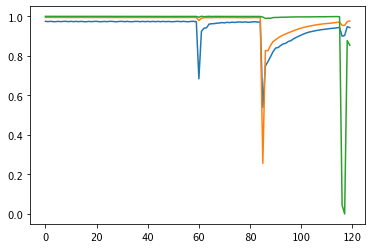

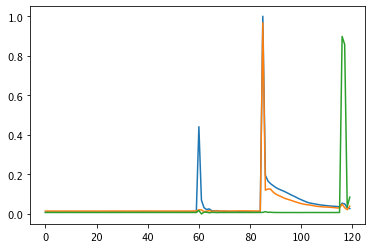

In [119]:

import matplotlib.pyplot as plt

plt.plot(final_norm[0,:,1], linestyle = '-')
plt.plot(final_norm[0,:,2], linestyle = '-')
plt.plot(final_norm[0,:,3], linestyle = '-')
plt.show()

# plt.figure(figsize=(15,3))
plt.plot(final_norm[0,:,5], linestyle = '-')
plt.plot(final_norm[0,:,6], linestyle = '-')
plt.plot(final_norm[0,:,7], linestyle = '-')
plt.show()




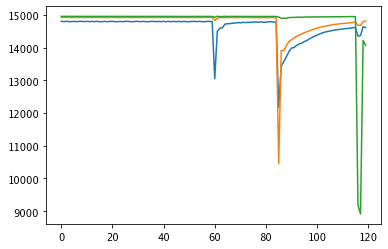

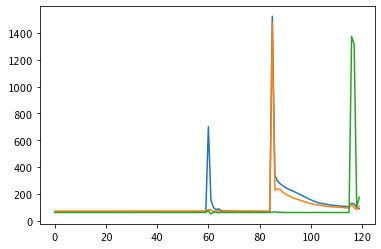

In [116]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(15,3))
plt.plot(_all[0], linestyle = '-')#i_even_a
plt.plot(_all[1], linestyle = '-')#i_even_b
plt.plot(_all[2], linestyle = '-')#i_even_c
plt.show()

plt.plot(_all[3], linestyle = '-')#i_odd_a
plt.plot(_all[4], linestyle = '-')#i_odd_a
plt.plot(_all[5], linestyle = '-')#i_odd_a
plt.show()


In [34]:
import numpy as np
###### Loading the saved files
saved_RMS_raw = np.load("/Users/apple/Documents/work_DFA/Labelizer/saved_RMS_v16_raw_2k.npy",allow_pickle=True)
saved_RMS_norm= np.load("/Users/apple/Documents/work_DFA/Labelizer/saved_RMS_v16_with_bias_2k.npy",allow_pickle=True)
saved_label = np.load("/Users/apple/Documents/work_DFA/All channel data/saved_RMS_label_v16_with_bias_2k.npy",allow_pickle=True)
# print(saved_RMS_raw[3].shape)
# print(saved_RMS_norm[3].shape)
print(saved_label[4])

['10110' '0' '6' '0' 'DFA107003001001_20190713_075038.pqd' '107003001001']


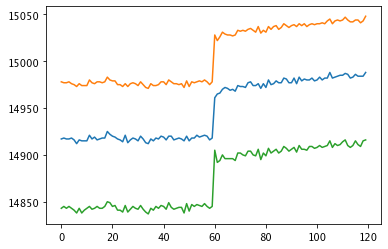

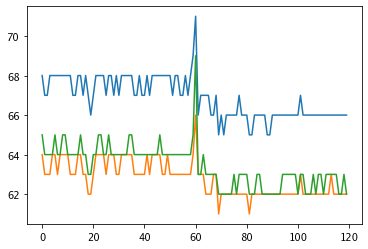

In [33]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(15,3))
plt.plot(saved_RMS_raw[3,:,0], linestyle = '-')#i_even_a
plt.plot(saved_RMS_raw[3,:,1], linestyle = '-')#i_even_b
plt.plot(saved_RMS_raw[3,:,2], linestyle = '-')#i_even_c
plt.show()

plt.plot(saved_RMS_raw[3,:,3], linestyle = '-')#i_odd_a
plt.plot(saved_RMS_raw[3,:,4], linestyle = '-')#i_odd_b
plt.plot(saved_RMS_raw[3,:,5], linestyle = '-')#i_odd_c
plt.show()

In [18]:
saved_RMS_raw[2,:,17]

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [12]:
saved_RMS_raw_upd = saved_RMS_raw[2,:,14]

In [22]:
saved_RMS_raw[0][17]

array([  14560,   14584,   14600,      80,      68,     100,       9,
            12,       9,       0,       0,       0,       0,       0,
             0,       2,       1,       2, 1147413, 1002630, 1438732,
         92438,   19953,  151054])

## Delete

In [51]:
import numpy as np
x_scl = np.load("/Users/apple/Documents/work_DFA/Labelizer/Carl_new/error_rms_77k_ce.npy",allow_pickle=True)
x_raw = np.load("/Users/apple/Documents/work_DFA/Labelizer/Carl_new/error_rms_raw_77k_ce.npy",allow_pickle=True)
# saved_RMS_label = np.load("/Users/apple/Documents/work_DFA/Labelizer/saved_RMS_label_v16_with_bias_2k.npy")
src = np.load('/Users/apple/Documents/work_DFA/Labelizer/Carl_new/saved_RMS_test_raw_15k_with_ce.npy',allow_pickle=True)

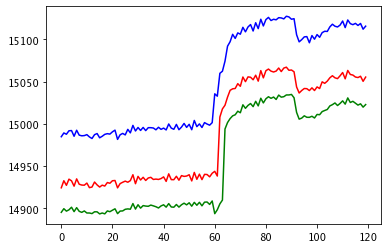

In [61]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(15,3))
plt.plot(x_raw[70,:,0], linestyle = '-',color = 'r')#i_even_a
plt.plot(x_raw[70,:,1], linestyle = '-',color = 'b')#i_even_b
plt.plot(x_raw[70,:,2], linestyle = '-',color = 'g')#i_even_c
plt.show()

# plt.plot(saved_RMS_raw[3,:,3], linestyle = '-')#i_odd_a
# plt.plot(saved_RMS_raw[3,:,4], linestyle = '-')#i_odd_b
# plt.plot(saved_RMS_raw[3,:,5], linestyle = '-')#i_odd_c
# plt.show()

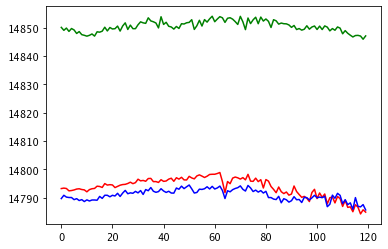

In [52]:
plt.plot(src[70,:,0], linestyle = '-',color = 'r')#i_even_a
plt.plot(src[70,:,1], linestyle = '-',color = 'b')#i_even_b
plt.plot(src[70,:,2], linestyle = '-',color = 'g')#i_even_c
plt.show()

In [35]:
src[70]

array([[ 14793.227,  14789.687,  14850.133, ..., 325217.56 , 147141.03 ,
        160873.34 ],
       [ 14793.388,  14790.855,  14849.088, ..., 326369.78 , 147385.81 ,
        159440.94 ],
       [ 14793.249,  14790.21 ,  14849.885, ..., 324927.6  , 146880.7  ,
        160658.16 ],
       ...,
       [ 14784.275,  14786.758,  14847.074, ..., 342539.22 , 163082.78 ,
        179395.   ],
       [ 14785.725,  14787.557,  14845.948, ..., 342802.47 , 162530.27 ,
        181076.5  ],
       [ 14784.905,  14785.683,  14847.12 , ..., 344157.22 , 163560.69 ,
        179259.02 ]], dtype=float32)

In [65]:
aaa = []
bbb = [1,2,3]
for i in bbb:
    aaa.append(x_raw[i])
np.save("/Users/apple/Documents/work_DFA/Labelizer/Carl_new/temp_raw.npy", aaa)
aaa = np.load("/Users/apple/Documents/work_DFA/Labelizer/Carl_new/temp_raw.npy",allow_pickle=True)

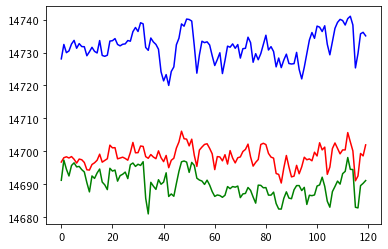

In [66]:
plt.plot(aaa[0,:,0], linestyle = '-',color = 'r')#i_even_a
plt.plot(aaa[0,:,1], linestyle = '-',color = 'b')#i_even_b
plt.plot(aaa[0,:,2], linestyle = '-',color = 'g')#i_even_c
plt.show()

## test db

In [67]:
import sqlite3
import pandas as pd
import numpy as np
import time
import shutil
from PIL import Image
from enum import IntEnum

event_dict = {
    'GENERIC_ARCING': 23100, 
    'GENERIC_LONG_ARCING': 23104,
    'GENERIC_SHORT_ARCING': 23102,
    'CAPACITOR_ON': 10110,
    'CAPACITOR_OFF': 10120,
    'CAPACITOR_ON_ABNORMAL': 20110,
    'CAPACITOR_RESTRIKE': 20210,
    'CAPACITOR_RESTRIKE_SEVERE': 20211,
    'CAPACITOR_ON_UNBALANCED': 20130,
    'CAPACITOR_BOUNCE': 20310,
    'CAPACITOR_OFF_UNBALANCED': 20140,
    'CAPACITOR_ON_VAR_IMBALANCE': 20510,
    'CAPACITOR_OFF_VAR_IMBALANCE': 20520,
    'ARCING_INSIDE_CAPACITOR': 23180,
    'UNKNOWN_ABNORMAL': 28110,
    'CT_PT_SWITCH_CLOSED': 30200,
    'CT_PT_SWITCH_OPENED': 30100,
    'OC_NORMAL': 15110,
    'OC_CAPACITOR': 20410,
    'OC_LESS_THAN_1_CYC': 15220,
    'REVERSE_FAULT': 15710,
    'INRUSH': 13170,
    'BREAKER_CLOSE': 13171,
    'LOAD_STEP_UP': 13120,
    'LOAD_STEP_DOWN': 13121,
    'MOTOR_START': 12110,
    'SERIES_SWITCH_ARCING': 23190,
    'VOLTAGE_STEP_UP': 13210,
    'VOLTAGE_STEP_DOWN': 13220,
    'LOAD_VARIATION': 13110,
    'VOLTAGE_HF_TRANSIENT': 13310,
    'CURRENT_HF_TRANSIENT': 23310
}

class Indx(IntEnum):
    ID = 0
    MONITOR = 1
    RECORD = 2
    FILE = 3
    CLASS = 4
    POSITION = 5
    PHASE = 6
    GROUND = 7
    FREQ = 8
    SECONDS = 9
    BLOB = 10
class SIndx(IntEnum):
    ID = 0
    NAME = 1
    PT_S_A = 2
    PT_S_B = 3
    PT_S_C = 4
    PT_P_A = 5
    PT_P_B = 6
    PT_P_C = 7
    CT_S_A = 8
    CT_S_B = 9
    CT_S_C = 10
    CT_P_A = 11
    CT_P_B = 12
    CT_P_C = 13
    VA_SCALE = 14
    VB_SCALE = 15
    VC_SCALE = 16
    IA_SCALE = 17
    IB_SCALE = 18
    IC_SCALE = 19
    PQ_SCALE = 99
    NO_SCALE = 100
class Channels(IntEnum):
    VA    =    0
    VB    =    1
    VC    =    2
    IA    =    3
    IB    =    4
    IC    =    5
    IN    =    6
    VA_PD =    7
    VB_PD =    8
    VC_PD =    9
    IA_PD =    10
    IB_PD =    11
    IC_PD =    12
    IN_PD =    13
    PA =       14
    PB =       15
    PC =       16
    QA =       17
    QB =       18
    QC =       19
    VA_SD =    20
    VB_SD =    21
    VC_SD =    22
    IA_SD =    23
    IB_SD =    24
    IC_SD =    25
    IN_SD =    26
    VA_EVENS = 27
    VB_EVENS = 28
    VC_EVENS = 29
    IA_EVENS = 30
    IB_EVENS = 31
    IC_EVENS = 32
    IN_EVENS = 33
    VA_ODDS =  34
    VB_ODDS =  35
    VC_ODDS =  36
    IA_ODDS =  37
    IB_ODDS =  38
    IC_ODDS =  39
    IN_ODDS =  40
    
    VA_NONS = 41
    VB_NONS = 42
    VC_NONS = 43
    IA_NONS = 44
    IB_NONS = 45
    IC_NONS = 46
    IN_NONS = 47
    VAB = 48
    VBC = 49
    VCA = 50
    
class ce(IntEnum):
    v = 0
    i = 3
    v_pd = 6
    i_pd = 9
    v_sd = 12
    i_sd = 15
    v_evens = 18
    i_evens = 21
    v_odds = 24
    i_odds = 27
    p = 30
    q = 33

Path = 'test_ml.sqlite'

# def sql_to_workspace(code,path = Drive_Path,limit = 10 ):
def sql_to_workspace(code,path = Path,limit = 10 ):
    # eve = ['23100','23104','23102','10110','10120','20110','20210','20211','20130','20310','20140','20510','20520','23180','28110','30200','30100','15110','20410','15220','15710','13170','13171','13120','13121','12110','23190','13210','13220','13110','13310','23310']
    connection =  sqlite3.connect(path)
    cur = connection.cursor()
    
    ##### Attaching multiple databases starts ####
    cur.execute("ATTACH DATABASE '/Volumes/Seagate Backup Plus Drive/DFA/dfa_ml_2.sqlite' AS dfa_ml_2") ## path change required
    cur.execute("ATTACH DATABASE '/Volumes/Seagate Backup Plus Drive/DFA/dfa_ml_3.sqlite' AS dfa_ml_3") ## path change required
    cur.execute("ATTACH DATABASE '/Volumes/Seagate Backup Plus Drive/DFA/dfa_ml_4.sqlite' AS dfa_ml_4") ## path change required
    
    clause = ""
    file_name = "main"
    limit=limit
    
    common_select = "select waveform_id, monitor_id, classification_code, position_code "
    common_where = """where monitor_id  NOT IN (110003001002, 100001001001, 100002001001, 100002002001, 
                                                100002002002, 101001001001, 101002001001, 101002001002, 
                                                101002001003, 110002001002) and 
                       monitor_id > 100000000000  and
                       monitor_id NOT IN (110001001001) and
                       duration_seconds >9 and duration_seconds < 30 """
    
    sql_fetch_blob_query_all = """SELECT id, monitor_id, waveform_id, file_name, classification_code, 
                                            position_code, phase_code, ground_code, powerline_frequency,
                                                duration_seconds, rms_data  
                            from """ + file_name + """.dfa_ml_data_records,
                            (select  max(waveform_id) as wav, max(monitor_id) as mon from
                            (""" + \
                             common_select + \
                             "FROM dfa_ml_data_records " +\
                             common_where + \
                               "UNION " + \
                             common_select + \
                             "FROM dfa_ml_2.dfa_ml_data_records " +\
                             common_where + \
                               "UNION " + \
                             common_select + \
                             "FROM dfa_ml_3.dfa_ml_data_records " + \
                             common_where + \
                            "UNION " + \
                             common_select + \
                             "FROM dfa_ml_4.dfa_ml_data_records " + \
                             common_where + \
                            """)
                            group  by waveform_id, monitor_id
                            having count(waveform_id) = 1 """ + \
                            clause + ") as der " + \
                            "where waveform_id = wav and monitor_id = mon and position_code =='0' and classification_code == "+ \
                            str(code) + \
                            " limit " +\
                            str(limit)
    ##### Attaching multiple databases ends ####
    
    ### Suppressing  for now ###
    sql_fetch_blob_query_1 = """SELECT id, monitor_id, waveform_id, file_name, classification_code, position_code, phase_code, ground_code, powerline_frequency, duration_seconds, rms_data  
                                from """ + file_name + """.dfa_ml_data_records,
                                (select  max(waveform_id) as wav, max(monitor_id) as mon from
                                (select waveform_id, monitor_id, classification_code, position_code FROM dfa_ml_data_records where monitor_id  NOT IN (110003001002, 100001001001, 100002001001, 100002002001, 100002002002, 101001001001, 101002001001, 101002001002, 101002001003, 110002001002) and monitor_id > 100000000000 and monitor_id NOT IN (110001001001) and duration_seconds >9 and duration_seconds < 30)
                                group  by waveform_id, monitor_id
                                having count(waveform_id) = 1 """ + \
                                clause + ") as der " + \
                                "where waveform_id = wav and monitor_id = mon and position_code =='0' and classification_code == "+ \
                                str(code) + \
                                " limit " +\
                                str(limit)
    #### One DB fetch suppress ends ####
    
    ## Position code is set to 0, so need to change as well
    start = time.time()
    records1=cur.execute(sql_fetch_blob_query_1)#prev - sql_fetch_blob_query_1
    end = time.time()
    print(end - start)
    newrcd = records1.fetchall()
    cur.execute("DETACH DATABASE dfa_ml_2")
    cur.execute("DETACH DATABASE dfa_ml_3")
    cur.execute("DETACH DATABASE dfa_ml_4")
#     cur.execute("DETACH DATABASE dfa_ml_5")
#     print(len(newrcd))
    return newrcd,code
    
        

def get_raw_vector_bulk(records_in, record_indx, channel, scale_indx):
#     print(records_in)
    arr = np.frombuffer(records_in[record_indx][-1], dtype=np.float32)
#     print('arr '+str(arr))
    leng = records_in[record_indx][Indx.SECONDS] * records_in[record_indx][Indx.FREQ]
#     print('leng '+str(leng))
    # array size constant 60 change
    vect_size  = arr[(leng*channel):(leng*(channel + 1))]
#     print(vect_size)
#     if len(vect_size) == 600:
#         vect = vect_size
#     elif len(vect_size) > 600:
#         vect = vect_size[:600]
#     else:
#         vect = np.pad(vect_size,(0,600-len(vect_size)))
    
#     vect = arr[(leng*channel):(leng*(channel + 1))][:600]
    vect = vect_size[60:180]
    pos_code = records_in[record_indx][5]
    phase_code = records_in[record_indx][6]
    evnt_id = records_in[record_indx][0]
    class_code = records_in[record_indx][4]
    file_name = records_in[record_indx][3]
    waveform_id = records_in[record_indx][1]
    ground_code = records_in[record_indx][7]
    return vect,pos_code,phase_code,evnt_id,class_code,file_name,waveform_id,ground_code


def all_channel_input(input  , no_of_record = 10):
    new_result = dict()
    app_range = [x for x in range (0,no_of_record)]
    channels = ['VA','VB','VC',
                'IA','IB','IC',#IN
                'VA_PD','VB_PD','VC_PD',
                'IA_PD','IB_PD','IC_PD',
                'VA_SD','VB_SD','VC_SD',
                'IA_SD','IB_SD','IC_SD',
                'VA_EVENS','VB_EVENS','VC_EVENS',
                'IA_EVENS','IB_EVENS','IC_EVENS',
                'VA_ODDS','VB_ODDS','VC_ODDS',
                'IA_ODDS','IB_ODDS','IC_ODDS',
                'PA','PB','PC',
                'QA','QB','QC',
                'VA_NONS','VB_NONS','VC_NONS',
                'IA_NONS','IB_NONS','IC_NONS','IN_NONS',
                'VAB','VBC','VCA'
                
                
    ]
    for i in app_range:
        rms_raw_vecs = []
        for j in channels:
            
            if j == 'VA':
                channel=Channels.VA
                scale_indx = SIndx.VA_SCALE
            elif j == 'VB':
                channel=Channels.VB
                scale_indx = SIndx.VB_SCALE
            elif j == 'VC':
                channel=Channels.VC
                scale_indx = SIndx.VC_SCALE
            elif j == 'IA':
                channel=Channels.IA
                scale_indx = SIndx.IA_SCALE
            elif j == 'IB':
                channel=Channels.IB
                scale_indx = SIndx.IB_SCALE
            elif j == 'IC':
                channel=Channels.IC
                scale_indx = SIndx.IC_SCALE
            elif j == 'VA_PD':
                channel=Channels.VA_PD
                scale_indx = SIndx.VA_SCALE
            elif j == 'VB_PD':
                channel=Channels.VB_PD
                scale_indx = SIndx.VB_SCALE
            elif j == 'VC_PD':
                channel=Channels.VC_PD
                scale_indx = SIndx.VC_SCALE
            elif j == 'IA_PD':
                channel=Channels.IA_PD
                scale_indx = SIndx.IA_SCALE
            elif j == 'IB_PD':
                channel=Channels.IB_PD
                scale_indx = SIndx.IB_SCALE
            elif j == 'IC_PD':
                channel=Channels.IC_PD
                scale_indx = SIndx.IC_SCALE
            elif j == 'VA_SD':
                channel=Channels.VA_SD
                scale_indx = SIndx.VA_SCALE
            elif j == 'VB_SD':
                channel=Channels.VB_SD
                scale_indx = SIndx.VB_SCALE
            elif j == 'VC_SD':
                channel=Channels.VC_SD
                scale_indx = SIndx.VC_SCALE 
            elif j == 'IA_SD':
                channel=Channels.IA_SD
                scale_indx = SIndx.IA_SCALE
            elif j == 'IB_SD':
                channel=Channels.IB_SD
                scale_indx = SIndx.IB_SCALE
            elif j == 'IC_SD':
                channel=Channels.IC_SD
                scale_indx = SIndx.IC_SCALE
            elif j == 'VA_EVENS':
                channel=Channels.VA_EVENS
                scale_indx = SIndx.VA_SCALE
            elif j == 'VB_EVENS':
                channel=Channels.VB_EVENS
                scale_indx = SIndx.VB_SCALE
            elif j == 'VC_EVENS':
                channel=Channels.VC_EVENS
                scale_indx = SIndx.VC_SCALE 
            elif j == 'IA_EVENS':
                channel=Channels.IA_EVENS
                scale_indx = SIndx.IA_SCALE
            elif j == 'IB_EVENS':
                channel=Channels.IB_EVENS
                scale_indx = SIndx.IB_SCALE
            elif j == 'IC_EVENS':
                channel=Channels.IC_EVENS
                scale_indx = SIndx.IC_SCALE
            elif j == 'VA_ODDS':
                channel=Channels.VA_ODDS
                scale_indx = SIndx.VA_SCALE
            elif j == 'VB_ODDS':
                channel=Channels.VB_ODDS
                scale_indx = SIndx.VB_SCALE
            elif j == 'VC_ODDS':
                channel=Channels.VC_ODDS
                scale_indx = SIndx.VC_SCALE 
            elif j == 'IA_ODDS':
                channel=Channels.IA_ODDS
                scale_indx = SIndx.IA_SCALE
            elif j == 'IB_ODDS':
                channel=Channels.IB_ODDS
                scale_indx = SIndx.IB_SCALE
            elif j == 'IC_ODDS':
                channel=Channels.IC_ODDS
                scale_indx = SIndx.IC_SCALE
            elif j =='PA':
                channel=Channels.PA
                scale_indx = SIndx.VA_SCALE
            elif j =='PB':
                channel=Channels.PB
                scale_indx = SIndx.VB_SCALE
            elif j =='PC':
                channel=Channels.PC
                scale_indx = SIndx.VC_SCALE                
            elif j =='QA':
                channel=Channels.QA
                scale_indx = SIndx.IA_SCALE
            elif j =='QB':
                channel=Channels.QB
                scale_indx = SIndx.IB_SCALE
            elif j =='QC':
                channel=Channels.QC
                scale_indx = SIndx.IC_SCALE
            
            elif j =='VA_NONS':
                channel=Channels.VA_NONS
                scale_indx = SIndx.VA_SCALE
            elif j == 'VB_NONS':
                channel=Channels.VB_NONS
                scale_indx = SIndx.VB_SCALE
            elif j == 'VC_NONS':
                channel=Channels.VC_NONS
                scale_indx = SIndx.VC_SCALE
                
            elif j =='IA_NONS':
                channel=Channels.IA_NONS
                scale_indx = SIndx.IA_SCALE
            elif j == 'IB_NONS':
                channel=Channels.IB_NONS
                scale_indx = SIndx.IB_SCALE
            elif j == 'IC_NONS':
                channel=Channels.IC_NONS
                scale_indx = SIndx.IC_SCALE
            elif j == 'IN_NONS':
                channel=Channels.IN_NONS
                scale_indx = SIndx.NO_SCALE
            
            elif j =='VAB':
                channel=Channels.VAB
                scale_indx = SIndx.VA_SCALE
            elif j =='VBC':
                channel=Channels.VBC
                scale_indx = SIndx.VB_SCALE
            elif j == 'VCA':
                channel=Channels.VCA
                scale_indx = SIndx.VC_SCALE
                
             
                    
            vect,pos_code,phase_code,evnt_id,class_code,file_name,waveform_id,ground_code = get_raw_vector_bulk(records_in = input, record_indx = i, channel=channel, scale_indx = scale_indx)
    #        #int push
            rms_raw_vecs.append(vect.astype(float))
#             rms_raw_vecs.append(vect)
        rms_raw_vecs.append(pos_code)
        rms_raw_vecs.append(phase_code)
        rms_raw_vecs.append(evnt_id)
        rms_raw_vecs.append(class_code)
        rms_raw_vecs.append(file_name)
        rms_raw_vecs.append(waveform_id)
        rms_raw_vecs.append(ground_code)
        new_result[i] = rms_raw_vecs
            
    return new_result      


####### Normalization and bias addition #########
i_params ={
    'small': 10,
    'med_start': 100,
    'med_end': 500,
    'big': 1000
    }

pq_params ={
    'small': 10000,
    'med_start': 50000,
    'med_end': 100000,
    'big': 500000
    }

def fuzzy_scale(val, params):
    ret = 0.0
    if val <= params['small']:
        ret = 0.33
    elif val < params['med_start']:
        ret  = 0.33 + (val - params['small']) * (0.33/(params['med_start'] - params['small']))
    elif val <= params['med_end']:
        ret = 0.66
    elif val < params['big']:
        ret  = 0.66 + (val - params['med_end']) * (0.33/(params['big'] - params['med_end']))
    else:
        ret = 1.0
    return ret

############ ends ##############





def normalize(new_result,new_max = 0):
    # final_norms = []
    # for i in range(0,limit):
        #change as per requirement, default selected sliced index for test purpose
    _all = new_result

    
    pos_code=_all[36]
    phase_code=_all[37]
    evnt_id = _all[38]
    class_code = _all[39]
    file_name = _all[40]
    waveform_id = _all[41]
    ground_code = _all[42]
    
    
### new normalization ###
    vabc_all = np.stack((_all[0],_all[1],_all[2]))
    vabc_max = np.max(vabc_all)
    vabc_min = np.min(vabc_all)

    v_range = vabc_max - vabc_min
    if new_max == 0:
        if v_range < 1 or vabc_max < 1:
            print('found vabc_max ' + str(v_range)+' <0 or '+ str(vabc_max)+' <0' )
            norm_va,norm_vb,norm_vc = ['x'],['x'],['x']
            v_bias = ['x']
        else:
            #skip the record
            # vabc_max if <1 skip this
            v_scale = v_range/vabc_max
            norm_va = (_all[0] - vabc_min)/(v_range)
            norm_vb = (_all[1] - vabc_min)/(v_range)
            norm_vc = (_all[2] - vabc_min)/(v_range)
            v_bias = [v_scale] * 120
    else:
        if v_range < 1 or vabc_max < 1:
            print('found ' + str(v_range)+' <0 or '+ str(vabc_max)+' <0' )
            norm_va,norm_vb,norm_vc = ['x'],['x'],['x']
            v_bias = ['x']
        else:
            v_scale = v_range/vabc_max
            norm_va = (_all[0])/(vabc_max)
            norm_vb = (_all[1])/(vabc_max)
            norm_vc = (_all[2])/(vabc_max)
            v_bias = [v_scale] * 120
    ## IA,IB,IC 
    iabc_all = np.stack((_all[3],_all[4],_all[5]))
    iabc_max = np.max(iabc_all)
    iabc_min = np.min(iabc_all)

    # i channel
    
    i_range = iabc_max - iabc_min #skip the record if < 0.001
    
    if new_max == 0:
        if i_range < 0.001:
            print('found i_range' + str(i_range)+' <0.001'  )
            norm_ia,norm_ib,norm_ic = ['x'],['x'],['x']
            i_bias = ['x']
    #     elif iabc_max < 1:
    #         norm_va,norm_vb,norm_vc = ['x'],['x'],['x']
        else:
            i_scale = fuzzy_scale(i_range, i_params)
            norm_ia = (_all[3] - iabc_min)/(i_range)
            norm_ib = (_all[4] - iabc_min)/(i_range)
            norm_ic = (_all[5] - iabc_min)/(i_range)
            i_bias = [i_scale] * 120
    else:
        if i_range < 0.001:
            print('found ' + str(i_range)+' <0.001'  )
            norm_ia,norm_ib,norm_ic = ['x'],['x'],['x']
            i_bias = ['x']
        else:
            i_scale = fuzzy_scale(i_range, i_params)
            norm_ia = (_all[3])/(iabc_max)
            norm_ib = (_all[4])/(iabc_max)
            norm_ic = (_all[5])/(iabc_max)
            i_bias = [i_scale] * 120
            
    
    
    #'VA_PD','VB_PD','VC_PD'
    PD_vabc_all =  np.stack((_all[6],_all[7],_all[8]))
    PD_vabc_max = np.max(PD_vabc_all)
    PD_vabc_min = np.min(PD_vabc_all)

    v_pd_scale = PD_vabc_max/vabc_max #vabc_max<1 skip and PD_vabc_max< 1
    
    if vabc_max <1 or PD_vabc_max<1:
        print('found PD_vabc_max' + str(vabc_max)+' <1'  )
        norm_va_pd,norm_vb_pd,norm_vc_pd = ['x'],['x'],['x']
        vpd_bias = ['x'] 
    else: 
        norm_va_pd = (_all[6] )/( PD_vabc_max)
        norm_vb_pd = (_all[7] )/( PD_vabc_max)
        norm_vc_pd = (_all[8] )/( PD_vabc_max)
        vpd_bias = [v_pd_scale] * 120
    
    #IA_PD,IB_PD,IC_PD
    PD_iabc_all = np.stack((_all[9],_all[10],_all[11]))
    PD_iabc_max = np.max(PD_iabc_all)
    PD_iabc_min = np.min(PD_iabc_all)
    if PD_iabc_max<0.001:
        print('found ' + str(PD_iabc_max)+' <0.001'  )
        norm_ia_pd,norm_ib_pd,norm_ic_pd = ['x'],['x'],['x']
        ipd_bias = ['x'] 
    else:
        i_pd_scale = fuzzy_scale(PD_iabc_max, i_params)
        norm_ia_pd = (_all[9] )/(PD_iabc_max)# PD_iabc_max <0.001
        norm_ib_pd = (_all[10])/(PD_iabc_max)
        norm_ic_pd = (_all[11])/(PD_iabc_max)
        ipd_bias = [i_pd_scale] * 120
    
    ### I_EVEN & I_ODD
    
    ## I_EVEN
    even_iabc_all = np.stack((_all[21],_all[22],_all[23]))
    even_iabc_max = np.max(even_iabc_all)
    even_iabc_min = np.min(even_iabc_all)
    if even_iabc_max<1e-10:
        print('found even_iabc_max ' + str(even_iabc_all)+' <0.001'  )
        norm_ia_even,norm_ib_even,norm_ic_even = ['x'],['x'],['x']
        ieven_bias = ['x'] 
    else:
        i_even_scale = fuzzy_scale(even_iabc_max, i_params)
        norm_ia_even = (_all[21] )/(even_iabc_max)# even_iabc_max <0.001
        norm_ib_even = (_all[22])/(even_iabc_max)
        norm_ic_even = (_all[23])/(even_iabc_max)
        ieven_bias = [i_even_scale] * 120
        
    ## I_ODD
    odd_iabc_all = np.stack((_all[27],_all[28],_all[29]))
    odd_iabc_max = np.max(odd_iabc_all)
    odd_iabc_min = np.min(odd_iabc_all)
    if odd_iabc_max<1e-10:
        print('found odd_iabc_max' + str(odd_iabc_all)+' <0.001'  )
        norm_ia_odd,norm_ib_odd,norm_ic_odd = ['x'],['x'],['x']
        iodd_bias = ['x'] 
    else:
        i_odd_scale = fuzzy_scale(odd_iabc_max, i_params)
        norm_ia_odd = (_all[27] )/(odd_iabc_max)# odd_iabc_max <0.001
        norm_ib_odd = (_all[28])/(odd_iabc_max)
        norm_ic_odd = (_all[29])/(odd_iabc_max)
        iodd_bias = [i_odd_scale] * 120
    
    
    
    #PA,PB,PC
    pabc_all = np.stack((_all[30],_all[31],_all[32]))
    pabc_min = np.min(pabc_all)
    pabc_max = np.max(pabc_all)

    p_range = pabc_max - pabc_min # p_range<1 skip
    if p_range<1:
        print('found p_range' + str(p_range)+' <1'  )
        norm_pa,norm_pb,norm_pc = ['x'],['x'],['x']
        p_bias = ['x']
    else:
        p_scale = fuzzy_scale(p_range, pq_params)
        norm_pa = (_all[30] - float(pabc_min))/p_range
        norm_pb = (_all[31] - float(pabc_min))/p_range
        norm_pc = (_all[32] - float(pabc_min))/p_range
        p_bias = [p_scale] * 120

    # QA,QB,QC
    qabc_all = np.stack((_all[33],_all[34],_all[35]))
    qabc_min = np.min(qabc_all)
    qabc_max = np.max(qabc_all)
    
    q_range = qabc_max - qabc_min # q_range<1 skip 
    if q_range< 1:
        print('found q_range' + str(q_range)+' <1'  )
        norm_qa,norm_qb,norm_qc = ['x'],['x'],['x']
        q_bias = ['x'] 
    else:  
        q_scale = fuzzy_scale(q_range, pq_params)
        norm_qa= (_all[33] - qabc_min)/q_range
        norm_qb= (_all[34] - qabc_min)/q_range
        norm_qc= (_all[35] - qabc_min)/q_range
        q_bias = [q_scale] * 120
    
    # VA_NONS,VB_NONS,VC_NONS
    vabc_nons_all = np.stack((_all[0],_all[1],_all[2]))
    vabc_max = np.max(vabc_all)
    vabc_min = np.min(vabc_all)

    v_range = vabc_max - vabc_min
    if new_max == 0:
        if v_range < 1 or vabc_max < 1:
            print('found vabc_max ' + str(v_range)+' <0 or '+ str(vabc_max)+' <0' )
            norm_va,norm_vb,norm_vc = ['x'],['x'],['x']
            v_bias = ['x']
        else:
            #skip the record
            # vabc_max if <1 skip this
            v_scale = v_range/vabc_max
            norm_va = (_all[0] - vabc_min)/(v_range)
            norm_vb = (_all[1] - vabc_min)/(v_range)
            norm_vc = (_all[2] - vabc_min)/(v_range)
            v_bias = [v_scale] * 120
    else:
        if v_range < 1 or vabc_max < 1:
            print('found ' + str(v_range)+' <0 or '+ str(vabc_max)+' <0' )
            norm_va,norm_vb,norm_vc = ['x'],['x'],['x']
            v_bias = ['x']
        else:
            v_scale = v_range/vabc_max
            norm_va = (_all[0])/(vabc_max)
            norm_vb = (_all[1])/(vabc_max)
            norm_vc = (_all[2])/(vabc_max)
            v_bias = [v_scale] * 120

    final_norm = [np.array(v_bias), norm_va,norm_vb,norm_vc,# np.array(v_bias)
                  np.array(i_bias) , norm_ia,norm_ib,norm_ic,#np.array(i_bias)
                     np.array(vpd_bias)  , norm_va_pd,norm_vb_pd,norm_vc_pd,# np.array(vpd_bias)
                       np.array(ipd_bias) , norm_ia_pd,norm_ib_pd,norm_ic_pd,#np.array(ipd_bias)
                          np.array(ieven_bias) , norm_ia_even,norm_ib_even,norm_ic_even,#np.array(ieven_bias)
                              np.array(iodd_bias) , norm_ia_odd,norm_ib_odd,norm_ic_odd,#np.array(ipd_bias)
                                  np.array(p_bias) , norm_pa,norm_pb,norm_pc,# np.array(p_bias)
                                     np.array(q_bias) ,  norm_qa,norm_qb,norm_qc#  np.array(q_bias)
                            
                            ]
    final_raw = [ _all[0],_all[1],_all[2],
                     _all[3],_all[4],_all[5],
                       _all[6],_all[7],_all[8],
                         _all[9],_all[10],_all[11],
                             _all[21],_all[22],_all[23],
                                _all[27],_all[28],_all[29],
                                     _all[30],_all[31],_all[32],
                                         _all[33],_all[34],_all[35]
        
                    ]
                            ### chn  va   ia  va-pd ia_pd  va_sd ia_sd va_evens ia_evens va_odds  ia_odds  pa   qa
                            ### As = [0]  [3]  [6]   [9]    [12]  [15]  [18]      [21]     [24]     [27]  [30] [33]
                            ### Bs = [1]  [4]  [7]   [10]   [13]  [16]  [19]      [22]     [25]     [28]  [31] [34]
                            ### Cs = [2]  [5]  [8]   [11]   [14]  [17]  [20]      [23]     [26]     [29]  [32] [35]
    # new_result[]
    return final_norm,pos_code,phase_code,evnt_id,class_code,file_name,_all,waveform_id,ground_code,final_raw
                


NameError: name 'IA_NONS' is not defined

In [ ]:
CREATE TABLE dfa_ml_data_records (id	INTEGER NOT NULL,waveform_id	INTEGER NOT NULL,monitor_id	INTEGER NOT NULL,file_name	TEXT NOT NULL,classification_code	INTEGER NOT NULL DEFAULT 0,position_code	INTEGER NOT NULL DEFAULT 0,phase_code	INTEGER NOT NULL,ground_code	INTEGER NOT NULL,flag	INTEGER NOT NULL,delta_pt	INTEGER NOT NULL,three_wire	INTEGER NOT NULL,powerline_frequency	INTEGER NOT NULL DEFAULT 60,duration_seconds	INTEGER NOT NULL DEFAULT 0,rms_data	BLOB NOT NULL,PRIMARY KEY(id))